# 💡 Examples

In this tutorial, you can see how to use `euclidlib` to get started and get familiar with the internal python format.

In [1]:
# import euclidlib, we reccomend the alias `el`
import euclidlib as el

## Reading data
Let's read an example of the photometric angular power spectra data, $C_{\ell}$, in the Euclid Consortium Science Ground Segment (SGS) Level 3 (LE3) format. 

You can find a description of all the SGS products at the [Euclid SGS Data Product Description Document](http://st-dm.pages.euclid-sgs.uk/data-product-doc/dm10/).

For this example, we download some synthetic data from Zenodo:

In [2]:
# Execute this cell to download the data
data_downloaded = False

if data_downloaded == False:
    
    import requests
    
    # URLs of the files to be downloaded
    urls = {
        'nz_example.fits': 'https://zenodo.org/records/15092862/files/nz_example.fits',
        'cls_example.fits': 'https://zenodo.org/records/17191365/files/example-spectra.fits'
    }
    
    # Function to download a file
    def download_file(url, filename):
        response = requests.get(url)
        if response.status_code == 200:
            with open(filename, 'wb') as f:
                f.write(response.content)
            print(f'{filename} downloaded successfully')
        else:
            print(f'Failed to download {filename}. Status code: {response.status_code}')
    
    # Download all files
    for filename, url in urls.items():
        download_file(url, filename)

nz_example.fits downloaded successfully
cls_example.fits downloaded successfully


In [3]:
# In this example, the name of the file is 'cls_example.fits'
cls = el.le3.pk_wl.angular_power_spectra(
    "cls_example.fits"
)

In [4]:
# What is the format of the returned python object?
print(type(cls))

<class 'dict'>


In [5]:
# What is the format of the returned python object?
print(cls.keys())

dict_keys([('POS', 'POS', 1, 1), ('POS', 'SHE', 1, 1), ('POS', 'POS', 1, 2), ('POS', 'SHE', 1, 2), ('POS', 'POS', 1, 3), ('POS', 'SHE', 1, 3), ('POS', 'POS', 1, 4), ('POS', 'SHE', 1, 4), ('POS', 'POS', 1, 5), ('POS', 'SHE', 1, 5), ('POS', 'POS', 1, 6), ('POS', 'SHE', 1, 6), ('SHE', 'SHE', 1, 1), ('POS', 'SHE', 2, 1), ('SHE', 'SHE', 1, 2), ('POS', 'SHE', 3, 1), ('SHE', 'SHE', 1, 3), ('POS', 'SHE', 4, 1), ('SHE', 'SHE', 1, 4), ('POS', 'SHE', 5, 1), ('SHE', 'SHE', 1, 5), ('POS', 'SHE', 6, 1), ('SHE', 'SHE', 1, 6), ('POS', 'POS', 2, 2), ('POS', 'SHE', 2, 2), ('POS', 'POS', 2, 3), ('POS', 'SHE', 2, 3), ('POS', 'POS', 2, 4), ('POS', 'SHE', 2, 4), ('POS', 'POS', 2, 5), ('POS', 'SHE', 2, 5), ('POS', 'POS', 2, 6), ('POS', 'SHE', 2, 6), ('SHE', 'SHE', 2, 2), ('POS', 'SHE', 3, 2), ('SHE', 'SHE', 2, 3), ('POS', 'SHE', 4, 2), ('SHE', 'SHE', 2, 4), ('POS', 'SHE', 5, 2), ('SHE', 'SHE', 2, 5), ('POS', 'SHE', 6, 2), ('SHE', 'SHE', 2, 6), ('POS', 'POS', 3, 3), ('POS', 'SHE', 3, 3), ('POS', 'POS', 3, 4),

### Understanding `euclidlib` internal python dictionary format

To store in python-native the read products, `euclidlib` uses python dictionaries with tuples as keys. 
In Python, dictionaries are data structures that store key-value pairs. Typically, dictionary keys are simple types like strings or numbers. However, Python allows more complex data types, like tuples, to be used as dictionary keys. 

A tuple is an ordered, immutable and unique collection of items. When a tuple is used as a dictionary key, the entire tuple is considered as a single key. The dictionary will use this tuple to map to a corresponding value. 

Here's an example of a dictionary that uses a tuple as a key:

```python
my_dict = {
    ('tracer_1', 'tracer_2', 1, 1): _dataclass_,
}
```

In `euclidlib`, we use tuples to define the observable tracer and the redshift bin dependency such as:

- `'tracer_1'` and `'tracer_2'` can refer to shear modes, positions...
- `1, 1` refers to the selected redshift bins 
- `_dataclass_` is a python dataclass where the measurements and other attributes are properly stored.

In [ ]:
# Let's access the dictionary entry corresponding
# to the key for the angular clustering data for the redshift bin 1
cls[("POS", "POS", 1, 1)]

AngularPowerSpectrum(axis=(0,))

In [7]:
# And similarly for cosmic shear angular power spectra.
# Note that the returned dataclass has as axis = 2 because the array that contains the measurements is 2x2
cls[("SHE", "SHE", 1, 1)]

AngularPowerSpectrum(axis=(2,))

Now, let's inspect the AngularPowerSpectrum object stored in `cls[("SHE", "SHE", 1, 1)]` and prints a compact, human-friendly summary of its attributes.

What it does (step‑by‑step)
- Picks the object to inspect:
    - `obj = cls[("SHE", "SHE", 1, 1)]`
- Defines helpers:
    - `short_repr(v, maxlen=120)`: safe, truncated `repr()` for arbitrary values.
    - `preview_array_like(v, n=6)`: returns a short preview for array-like values (uses `np.asarray`), showing up to `n` elements and total size.
- Collects non-dunder members using `inspect.getmembers(obj)` and filters out names starting with "_".
- Buckets members into three lists:
    - `callables`: names where `callable(val)` is True.
    - `arrays`: members that are `np.ndarray` or have both `shape` and `dtype` attributes; for each it records (name, shape, dtype, preview).
    - `others`: everything else (type name + short repr), with exceptions caught and reported.
- Prints a compact summary:
    - The repr of the inspected object and the count of non-dunder members.
    - A list of array-like members with shape, dtype and a short data preview.
    - A list of callable members.
    - A list of other members with type and value preview.
- Additionally prints, if present, explicit summaries (shape, dtype and preview) for fields named `ell`, `lower`, `upper`, and `weight`.

In [18]:
import inspect

# object to inspect (already present in the notebook)
obj = cls[("SHE", "SHE", 1, 1)]

def short_repr(v, maxlen=120):
    try:
        r = repr(v)
    except Exception:
        return f"<unrepr-able {type(v).__name__}>"
    return (r[:maxlen] + "...") if len(r) > maxlen else r

def preview_array_like(v, n=6):
    "Return a short preview for array-like values."
    try:
        a = np.asarray(v)
        if a.size == 0:
            return "empty array"
        if a.size <= n:
            return repr(a)
        return f"{repr(a.flat[:n].tolist())} ... (total {a.size})"
    except Exception:
        return short_repr(v)

# collect all non-dunder members
members = inspect.getmembers(obj)
members = [m for m in members if not m[0].startswith("_")]

# bucket members for clearer output
callables = []
arrays = []
others = []

for name, val in members:
    try:
        if callable(val):
            callables.append(name)
        elif isinstance(val, np.ndarray) or (hasattr(val, "shape") and hasattr(val, "dtype")):
            # array-like summary: shape, dtype, preview
            shape = getattr(val, "shape", None)
            dtype = getattr(val, "dtype", None)
            preview = preview_array_like(val)
            arrays.append((name, shape, dtype, preview))
        else:
            others.append((name, type(val).__name__, short_repr(val)))
    except Exception as e:
        others.append((name, "error", f"<error inspecting: {e}>"))

# print a compact, illustrative summary
print(f"Inspecting object: {obj!r}")
print(f"Found {len(members)} non-dunder members\n")

print("Array-like members (name, shape, dtype, preview):")
for name, shape, dtype, preview in arrays:
    print(f" - {name}: shape={shape}, dtype={dtype}, preview={preview}")
if not arrays:
    print(" (none)")

print("\nCallable members (name):")
for name in callables:
    print(f" - {name}")
if not callables:
    print(" (none)")

print("\nOther members (name, type, value-preview):")
for name, tname, preview in others:
    print(f" - {name}: {tname}, {preview}")
if not others:
    print(" (none)")

# Example: show a few well-known fields explicitly for quick reference
for key in ("ell", "lower", "upper", "weight"):
    if hasattr(obj, key):
        val = getattr(obj, key)
        print(f"\n{key}: shape={getattr(val,'shape',None)}, dtype={getattr(val,'dtype',None)}")
        print(" preview ->", preview_array_like(val, n=8))

Inspecting object: AngularPowerSpectrum(axis=(2,))
Found 10 non-dunder members

Array-like members (name, shape, dtype, preview):
 - array: shape=(2, 2, 32), dtype=float64, preview=[3.8688941032396493e-10, 3.8041352085874846e-10, 2.63871149425675e-10, 3.647611052683994e-10, 3.200254314314756e-10, 1.7181332604383824e-10] ... (total 128)
 - ell: shape=(32,), dtype=>f8, preview=[10.0, 12.0, 15.0, 18.0, 21.5, 26.0] ... (total 32)
 - lower: shape=(32,), dtype=>i8, preview=[10, 11, 14, 17, 20, 24] ... (total 32)
 - upper: shape=(32,), dtype=>i8, preview=[11, 14, 17, 20, 24, 29] ... (total 32)
 - weight: shape=(32,), dtype=>f8, preview=[1.0, 3.0, 3.0, 3.0, 4.0, 5.0] ... (total 32)

Callable members (name):
 (none)

Other members (name, type, value-preview):
 - axis: tuple, (2,)
 - dtype: Float64DType, dtype('float64')
 - ndim: int, 3
 - shape: tuple, (2, 2, 32)
 - software: NoneType, None

ell: shape=(32,), dtype=>f8
 preview -> [10.0, 12.0, 15.0, 18.0, 21.5, 26.0, 31.0, 37.0] ... (total 32)


The python dictionary entry corresponding to the key tuple `('POS', 'POS', 1, 1)` contains a NumPy structured array with names `'L'` (multipoles), `'CL'` (angular power spectra), and binning schema `'LMIN'`, `'LMAX'` and `'W'`.

### Plotting data products 

Below you can find some examples of how to plot Euclid data products

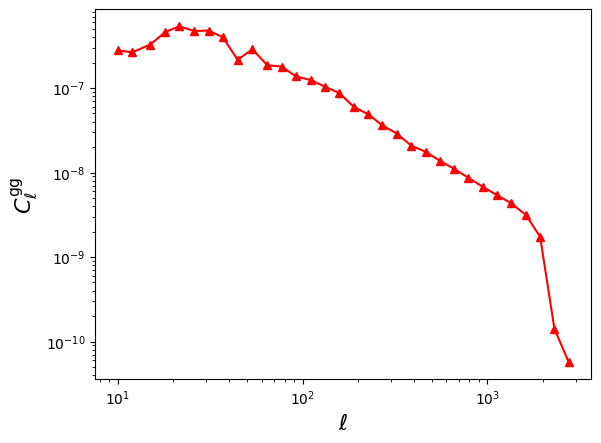

In [8]:
# Plot the corresponding angular power spectrum
# In this example, we are plotting the galaxy-galaxy angular power spectrum
import matplotlib.pyplot as plt

plt.loglog(cls[("POS", "POS", 1, 1)].ell, cls[("POS", "POS", 1, 1)].array, 'r^-')
plt.xlabel(r"$\ell$", fontsize=16)
plt.ylabel(r"$C^{\rm gg}_\ell$", fontsize=16);

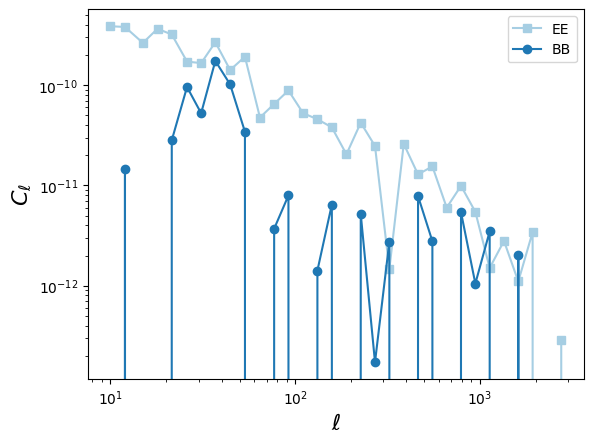

In [9]:
plt.plot(cls[("SHE", "SHE", 1, 1)].ell, cls[("SHE", "SHE", 1, 1)].array[0, 0], 's-', label='EE')
plt.plot(cls[("SHE", "SHE", 1, 1)].ell, cls[("SHE", "SHE", 1, 1)].array[1, 1], 'o-', label='BB')
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r"$\ell$", fontsize=16)
plt.ylabel(r"$C_\ell$", fontsize=16);
plt.legend();

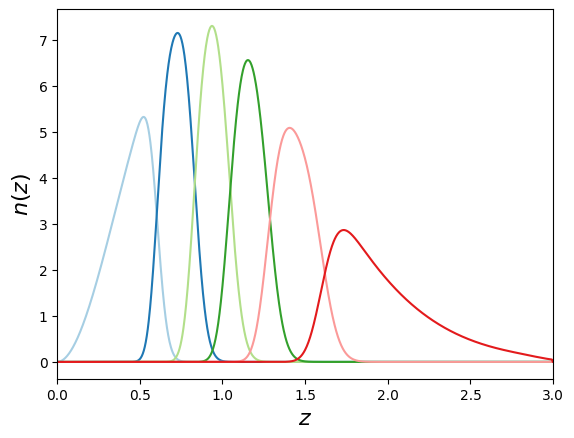

In [10]:
# you can also read other products,
# such as the galaxy redshift bin distribution n(z)
z, nz = el.phz.redshift_distributions(
    "nz_example.fits"
)
for bin in range(1, len(nz) + 1):
    plt.plot(z, nz[bin])
plt.xlabel(r"$z$", fontsize=16)
plt.ylabel(r"$n(z)$", fontsize=16)
plt.xlim(0, 3.0);